In [5]:
# Manipulate date
import pandas as pd 
import numpy as np
# Visualize data 
import matplotlib.pyplot as plt
import seaborn as sns
# Load Model and data
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
model = load_model("my_model")

In [9]:
data = ImageDataGenerator(rescale = 1./255)
val_generator = data.flow_from_directory('/Users/pabloalonsomedrano/Desktop/Eurosat/Eurosat/val', 
target_size=(64,64), batch_size=100, class_mode='sparse')

Found 2700 images belonging to 10 classes.


# Plot predicted vs actual label

In [10]:
# Generate predictions on the validation data
predicted_labels = model.predict_generator(val_generator)

/var/folders/6s/wv7gl9zx4blgt0hj5k5cj_nr0000gn/T/ipykernel_6801/1628852439.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicted_labels = model.predict_generator(val_generator)


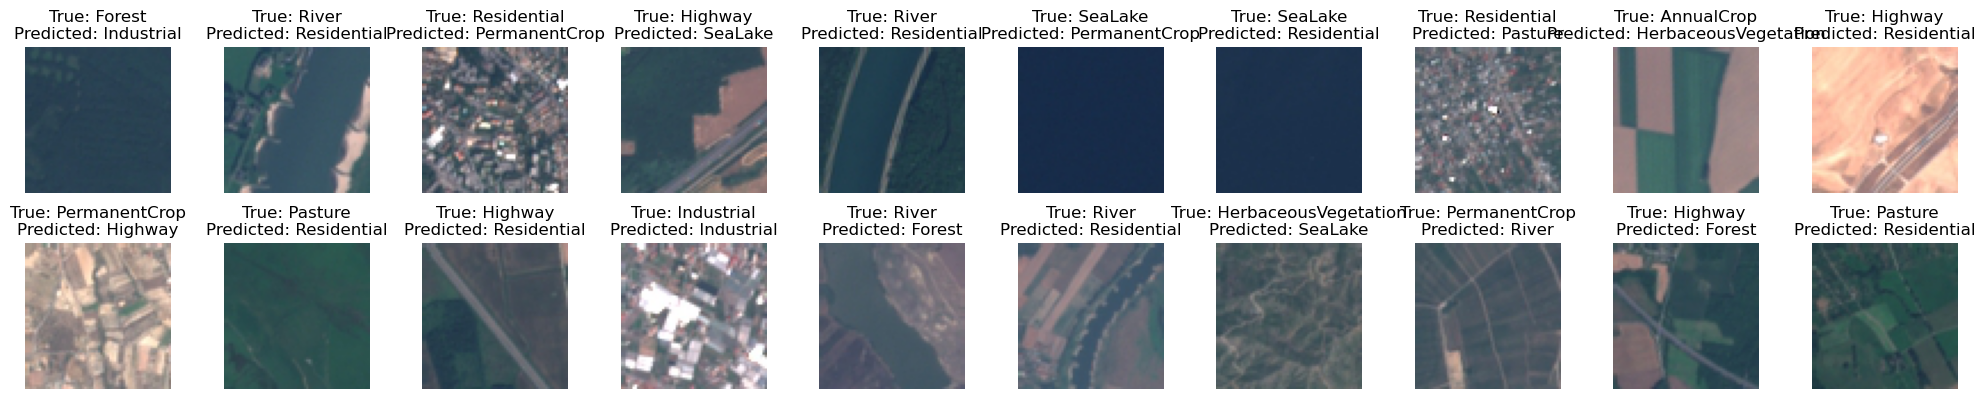

In [11]:
# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predicted_labels, axis=1)

# Get the true labels for the validation data
true_labels = val_generator.classes

# Get the class names for the Eurosat dataset
class_names = list(val_generator.class_indices.keys())

# Choose 20 random images from the validation set
random_indices = np.random.choice(range(len(true_labels)), size=20, replace=False)

# Plot the random images and their predicted vs true labels
from PIL import Image

plt.figure(figsize=(20, 8))
for i, idx in enumerate(random_indices):
    # Load the image
    img = Image.open(val_generator.filepaths[idx])
    # Plot the image
    plt.subplot(4, 10, i+1)
    plt.imshow(img)
    plt.axis('off')
    # Add the predicted and true labels as title
    plt.title('True: {}\nPredicted: {}'.format(class_names[true_labels[idx]], class_names[predicted_labels[idx]]))
plt.tight_layout()
plt.show()

In [ ]:
# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(val_generator.classes, predicted_labels, target_names=val_generator.class_indices.keys()))

# Print the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_generator.classes, predicted_labels))

                      precision    recall  f1-score   support

          AnnualCrop       0.11      0.09      0.10      3000
              Forest       0.11      0.12      0.11      3000
HerbaceousVegetation       0.11      0.08      0.09      3000
             Highway       0.08      0.08      0.08      2500
          Industrial       0.09      0.09      0.09      2500
             Pasture       0.07      0.06      0.07      2000
       PermanentCrop       0.09      0.09      0.09      2500
         Residential       0.11      0.16      0.13      3000
               River       0.09      0.09      0.09      2500
             SeaLake       0.12      0.11      0.12      3000

            accuracy                           0.10     27000
           macro avg       0.10      0.10      0.10     27000
        weighted avg       0.10      0.10      0.10     27000

[[283 354 252 261 290 225 283 504 269 279]
 [283 366 247 259 307 194 279 481 255 329]
 [308 374 234 238 295 221 287 481 261 301]
